# Traitement Automatique du Langage Naturel 02

## Enoncé :
En utilisant les deux fichiers Text_data_1.txt et Text_data_2.txt donnés en TP, donnez le code source
en python en suivant les instructions suivantes :

1. Importez spaCy et chargez le modèle en_core_web_sm qu'on nommera nlp

2. Importez matplotlib.pyplot as plt afin d'aficher des figures

3. Définissez une petite fonction nommée get_word_vectors qui retourne la forme vectorielle d'une liste de mots donnés en entrée, ex : utilisez nlp(word).vector pour avoir la forme vectorielle du mot word.

4. En suivant les étapes données dans la fiche de TP1, récupérez manuellement la liste des quarante mots les plus utilisés dans chacun des deux fichiers et mettez-les dans deux listes difiérentes.

5. Les vecteurs sont donnés en 300 dimensions, pour visualiser le résultat souhaité en deux dimensions, utilisez le PCA (Principal Component Analysis). Pour cela, utilisez simplement la suite d'instructions :

 - from sklearn.decomposition import PCA

 - pca = PCA(n_components = 2)

 - pca.fit(get_word_vectors(words1)) (words1 : liste des mots du fichier 1 par exemple)

 - word_vecs_2d_1 = pca.transform(get_word_vectors(words1))

6. A ce niveau, vous avez donc deux listes contenants chacune les quarante mots les plus utilisés dans chaque fichier, et ceci, sous la forme d'un vecteur à deux dimensions. Donnez le code source qui puisse aficher les deux figures suivantes :

 - Figure 1 : présente les coordonnées de chacun des mots de chacun des deux fichiers (utilisez deux symboles différents pour chaque liste de mots)

 - Figure 2 : présente les mots correspondant à chacun des deux fichiers (utilisez deux couleurs différentes pour chaque liste de mots)

Question :
- Que pensez vous des résultats obtenus à l'oeil nu (concernant la similarité des deux fichiers) 


### Improtation des bibliotheques nécéssaires :

In [5]:
import spacy
import nltk
import en_core_web_sm
from spacy.tokenizer import Tokenizer
from collections import Counter
nlp = spacy.load("en_core_web_sm")
import numpy as np
import gensim 
from gensim.models import Word2Vec 

In [6]:
import matplotlib.pyplot as plt

# Prétraitement

In [ ]:
fichier1 = list();
fichier2 = list();
plx = list();
ply = list();


# Fonction de vectorisation :

In [7]:
def get_word_vectors(word):
    ab = list();
    for token in word:
        ab.append(nlp(token).vector)
    return ab


# Recuperation des 40 mots les plus utilisé dans le fichier 1 :

In [8]:
file= open("Text_01.txt","r") # Ouvrir le fichier en lecture
token_list = []                 # Créer une liste pour les tokens
for line in file :
    one_line = nlp(line)        # Faire l'analyse de chaque ligne du fichier via la fonction 'nlp'
    token_list.extend(one_line) # Ajouter la ligne analysée à la liste 'token_list' via la fonction 'extend'
file.close;                     # Fermer le fichier
#for token in token_list :       # On peut par exemple afficher les lemmes  de ces tokens
    #print(token.lemma_)    

list_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS) # Récupérer la liste des stopwords
#print(list_stopwords[:])                                   # Affichage des stopwords 


ponct = [',','.','!','?','\n',';',':','"','“','”','‘','(',')',"'",'[',']','--','...','/'] # Créer une liste contenant les symboles de ponctuation
list_stopwords.extend(ponct)                                                              # Ajouter les ponctuations à la liste des stopwords
#print(list_stopwords[:])                                                                  # Afficher la nouvelle liste

token_list_filtred1 = [token for token in token_list if token.text not in list_stopwords] # Eliminer les tokens correspondant aux stopwords


token_list_filtred2 = [token for token in token_list_filtred1 # Eliminer les pronoms et les verbes
                       if token.lemma_ !='-PRON-'
                       and token.lemma_ != '-'
                       and token.pos_ != 'VERB'
                      ]
#print(token_list_filtred2)                                    # Afficher la nouvelle liste

token_list_filtred2_lemma = [token.lemma_ for token in token_list_filtred2] # Récupérer tous les lèmmes de la nouvelle liste des tokens
word_counter = {}                                                           # Créer un dicionnaire
for word in token_list_filtred2_lemma:                                      # Compter le nombre d'apparition de chaque lèmme
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1
#print(word_counter)                                                         # Afficher le dicionnaire

# Tri des lèmmes en fonction du nombre d'apparition:
# --------
SortedFiltreLemma=dict();    
list_keys = []            
for key, value in sorted(word_counter.items(), key=lambda item: item[1],reverse=True):
    SortedFiltreLemma[key]=value
    list_keys.append(key)
    #print("%s: %s" % (key, value))

    
list_keys_filtred1=list_keys[0:40]
print ("Liste des 40 mots les plus repeter dans le fichier text :",list_keys_filtred1)


Liste des 40 mots les plus repeter dans le fichier text : ['China', 'air', 'pollution', 'coal', 'quality', 'power', 'year', 'and', 'but', 'global', 'government', 'solar', 'datum', 'country', 'actually', 'energy', 'PM2.5', 'US', 'statistic', 'this', 'clean', 'so', 'environmental', 'course', 'consumption', 'carbon', 'one', 'good', 'people', 'chinese', 'environment', 'policy', 'like', 'fact', 'world', 'in', 'reduction', 'climate', 'emission', 'the']


# Recuperation des 40 mots les plus utilisé dans le fichier 1 :

In [9]:
file= open("Text_02.txt","r") # Ouvrir le fichier en lecture
token_list = []                 # Créer une liste pour les tokens
for line in file :
    one_line = nlp(line)        # Faire l'analyse de chaque ligne du fichier via la fonction 'nlp'
    token_list.extend(one_line) # Ajouter la ligne analysée à la liste 'token_list' via la fonction 'extend'
file.close;                     # Fermer le fichier
#for token in token_list :       # On peut par exemple afficher les lemmes  de ces tokens
    #print(token.lemma_)    

list_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS) # Récupérer la liste des stopwords
#print(list_stopwords[:])                                   # Affichage des stopwords 


ponct = [',','.','!','?','\n',';',':','"','“','”','‘','(',')',"'",'[',']','--','...','/'] # Créer une liste contenant les symboles de ponctuation
list_stopwords.extend(ponct)                                                              # Ajouter les ponctuations à la liste des stopwords
#print(list_stopwords[:])                                                                  # Afficher la nouvelle liste

token_list_filtred1 = [token for token in token_list if token.text not in list_stopwords] # Eliminer les tokens correspondant aux stopwords


token_list_filtred2 = [token for token in token_list_filtred1 # Eliminer les pronoms et les verbes
                       if token.lemma_ !='-PRON-'
                       and token.lemma_ != '-'
                       and token.pos_ != 'VERB'
                      ]
#print(token_list_filtred2)                                    # Afficher la nouvelle liste

token_list_filtred2_lemma = [token.lemma_ for token in token_list_filtred2] # Récupérer tous les lèmmes de la nouvelle liste des tokens
word_counter = {}                                                           # Créer un dicionnaire
for word in token_list_filtred2_lemma:                                      # Compter le nombre d'apparition de chaque lèmme
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1
#print(word_counter)                                                         # Afficher le dicionnaire

# Tri des lèmmes en fonction du nombre d'apparition:
# --------
SortedFiltreLemma=dict();    
list_keys = []            
for key, value in sorted(word_counter.items(), key=lambda item: item[1],reverse=True):
    SortedFiltreLemma[key]=value
    list_keys.append(key)
    #print("%s: %s" % (key, value))

    
list_keys_filtred2=list_keys[0:40]
print ("Liste des 40 mots les plus repeter dans le fichier text :",list_keys_filtred2)

Liste des 40 mots les plus repeter dans le fichier text : ['energy', 'relationship', 'and', 'like', 'power', 'problem', 'but', 'coal', 'calorie', 'okay', 'question', 'so', 'plant', 'be', 'thing', 'day', 'the', 'laughter', 'human', 'well', 'electricity', 'good', 'that', 'mile', 'there', 'journalist', 'role', 'here', 'physics', 'smart', 'because', 'insignificant', 'year', 'grid', 'step', 'communication', 'beer', 'ago', 'use', 'then']


# Reduction de dimession pour le 1er vecteur :

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
words1 = list()
words1 = list_keys_filtred1
pca.fit(get_word_vectors(words1)) # (words1 : liste des mots du fichier 1)
word_vecs_2d_1 = pca.transform(get_word_vectors(words1))

# Reduction de dimession pour le 2eme vecteur :

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
words2 = list()
words2 = list_keys_filtred2
pca.fit(get_word_vectors(words2)) # (words2 : liste des mots du fichier 2)
word_vecs_2d_2 = pca.transform(get_word_vectors(words2))

# Affichage des figures

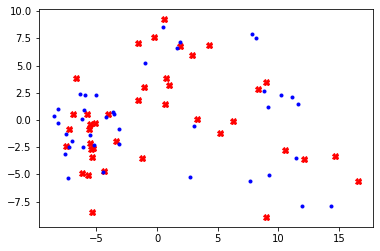

In [20]:
plt.plot(word_vecs_2d_1[:,0:1],word_vecs_2d_1[:,1:],"rX")
plt.plot(word_vecs_2d_2[:,0:1],word_vecs_2d_2[:,1:],"b.")

# Reponse à la dernière question :

La similarité des deux fichier est presque parfaite.